# **Task 1: Predictive Modeling (Classification)**

# Import Dependencies

In [87]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# Connect colab with drive

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read dataset using pandas

In [38]:
data = pd.read_csv('/content/drive/MyDrive/House Price Prediction.csv', header=None, sep = r"\s+")

In [39]:
data.shape

(506, 14)

# Assign column names

In [42]:
if data.shape[1] == 14:
  data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
else:
  print("Unexpected Number of columns:", data.shape[1])

print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


# Apply MinMaxScaler to scale numeric columns

In [44]:
scaler = MinMaxScaler()

In [52]:
cols_to_scale = data.columns[[0,1,2,3,4,5,6,7,9,10,11,12]]

In [53]:
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [54]:
print(data[cols_to_scale].head())

       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        TAX   PTRATIO         B     LSTAT  
0  0.208015  0.287234  1.000000  0.089680  
1  0.104962  0.553191  1.000000  0.204470  
2  0.104962  0.553191  0.989737  0.063466  
3  0.066794  0.648936  0.994276  0.033389  
4  0.066794  0.648936  1.000000  0.099338  


# Convert Target feature to classes

In [57]:
#calculate median of target column
median_value = data[data.columns[-1]].median()
median_value

0.36

In [64]:
#convert target to binary
data['target_binary'] = (data[data.columns[-1]] >= median_value).astype(int)

In [65]:
print(data[['target_binary', data.columns[-1]]].head())

   target_binary  target_binary
0              1              1
1              1              1
2              1              1
3              1              1
4              1              1


In [67]:
data = data.drop(data.columns[-2], axis=1)

In [68]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target_binary
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,1
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,1
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,1
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,1
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,1


In [69]:
data['target_binary'].unique()

array([1, 0])

# Split data

In [72]:
x = data.drop('target_binary', axis=1)
y = data['target_binary']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression

In [83]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],  # solvers supported
    'max_iter': [100, 200, 500]
}

In [88]:
# Cross validation
logreg = LogisticRegression()
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [89]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [90]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Score: 0.8663271604938272


In [91]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [92]:
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8725490196078431
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        60
           1       0.84      0.86      0.85        42

    accuracy                           0.87       102
   macro avg       0.87      0.87      0.87       102
weighted avg       0.87      0.87      0.87       102



# Decision Tree

In [93]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [94]:
dt = DecisionTreeClassifier(random_state=42)


In [95]:
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [97]:
grid_search_dt.fit(x_train, y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [98]:
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-validation Score:", grid_search_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Score: 0.834074074074074


In [100]:
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)

In [101]:
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Test Accuracy: 0.8921568627450981
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        60
           1       0.92      0.81      0.86        42

    accuracy                           0.89       102
   macro avg       0.90      0.88      0.89       102
weighted avg       0.89      0.89      0.89       102



# Random Forest

In [102]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [103]:
rf = RandomForestClassifier(random_state=42)


In [105]:
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [107]:
grid_search_rf.fit(x_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [108]:
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-validation Score:", grid_search_rf.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.8762345679012344


In [110]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)

In [111]:
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Test Accuracy: 0.8725490196078431
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        60
           1       0.81      0.90      0.85        42

    accuracy                           0.87       102
   macro avg       0.87      0.88      0.87       102
weighted avg       0.88      0.87      0.87       102



# Plot comparison of all models

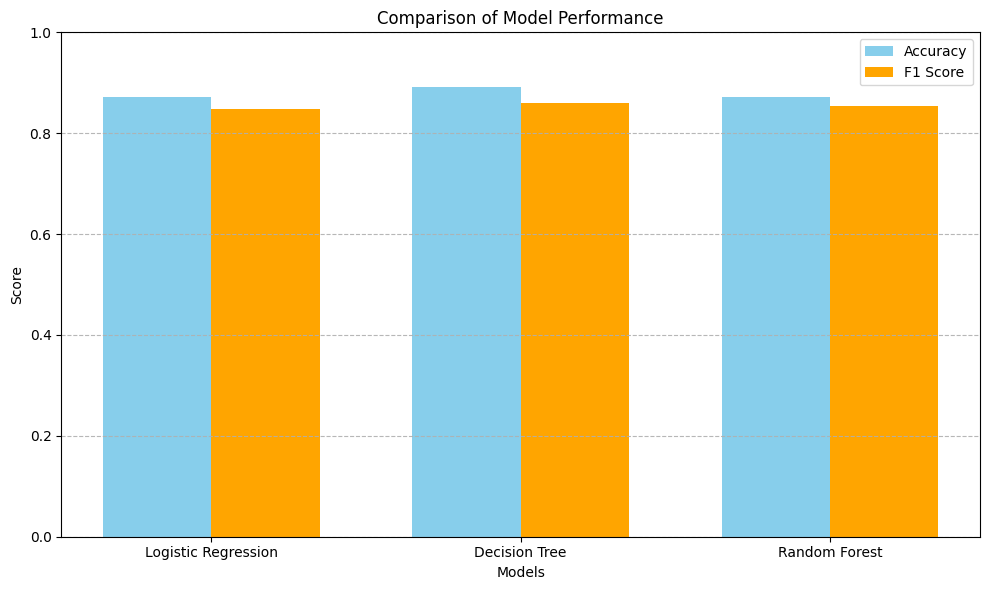

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Calculate metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]
f1_scores = [
    f1_score(y_test, y_pred),
    f1_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_rf)
]

# Plotting
x = range(len(models))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, accuracies, width=bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], f1_scores, width=bar_width, label='F1 Score', color='orange')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.xticks([i + bar_width / 2 for i in x], models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()